# Projeto de conclusão da formação em Data Science da Alura
### Aluno: Daniel Pimenta Furtado

## Resumo dos resultados encontrados
<li>Filmes de Crimes possuem uma avaliação muito boa entre os usuários</li>
<li>Os filmes de Drama são bem avaliados e que filmes de Ação são bem populares</li>
<li>Os filmes da Disney elevam os números da categoria Animação</li> 
    

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto realizou-se uma análise exploratória desses dados.

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import ranksums
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint
import numpy as np
import statsmodels.api as sm
import itertools
print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 0.24.1
Usando seaborn 0.9.0
Usando scipy 1.2.0
Usando numpy 1.15.4


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [2]:
filmes=pd.read_csv('movies.csv')

In [3]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
filmes.rename(columns = {"movieId" : "filmeId", "title" : "titulo", "genres" : "generos"}, inplace= True)
filmes.set_index('filmeId', inplace = True)
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


## Pergunta: extraia o ano dos filmes  

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
notas=pd.read_csv('ratings.csv')
notas.rename(columns = {"userId" : "usuarioId", "movieId" : "filmeId", "rating" : "nota", "timestamp" : "momento"}, inplace= True)

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`


In [9]:
nota_media=notas.groupby("filmeId").nota.mean().round(4)
filmes["nota_media"]=nota_media

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.9209
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.4318
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.2596
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.3571
5,Father of the Bride Part II (1995),Comedy,1995.0,3.0714


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_notas` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
total_de_notas=notas.groupby("filmeId").nota.count()
filmes["total_de_notas"]=total_de_notas
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_notas
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.9209,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.4318,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.2596,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.3571,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.0714,49.0


In [12]:
filmes = filmes.query("total_de_notas >= 50")

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_notas
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.9209,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.4318,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.2596,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.9461,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.1852,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function


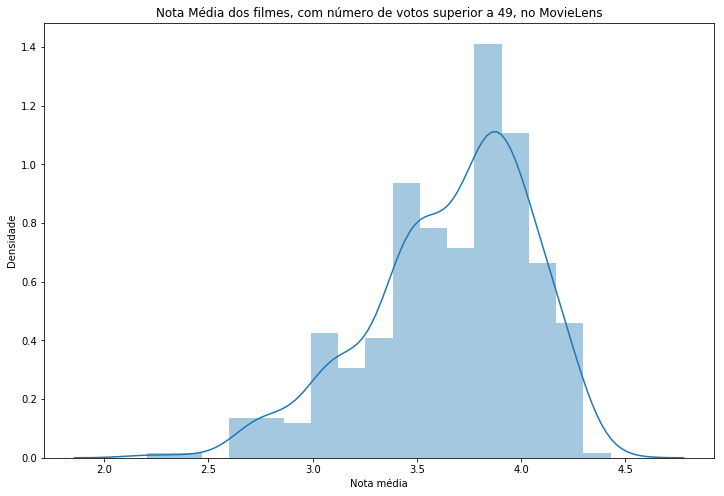

In [14]:
ax = sns.distplot(filmes["nota_media"])
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Nota média', ylabel="Densidade")
ax.set_title("Nota Média dos filmes, com número de votos superior a 49, no MovieLens")
ax

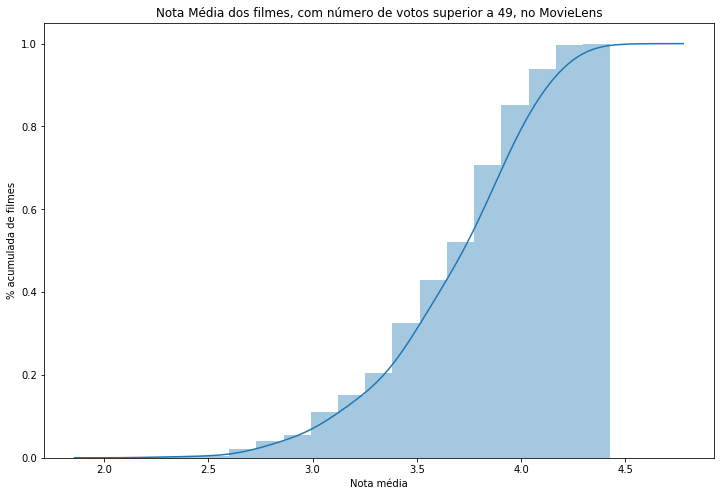

In [15]:
ax = sns.distplot(filmes["nota_media"], hist_kws={'cumulative' : True}, kde_kws={'cumulative' : True})
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Nota média', ylabel="% acumulada de filmes")
ax.set_title("Nota Média dos filmes, com número de votos superior a 49, no MovieLens")
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

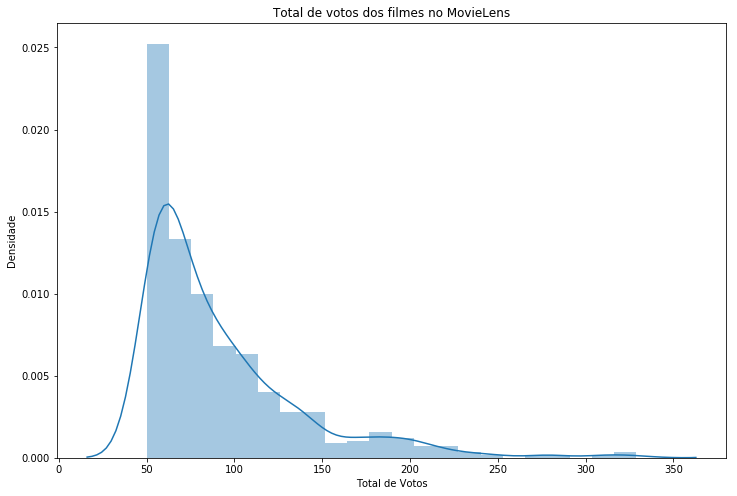

In [16]:
ax = sns.distplot(filmes["total_de_notas"])
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Total de Votos', ylabel="Densidade")
ax.set_title("Total de votos dos filmes no MovieLens")
ax

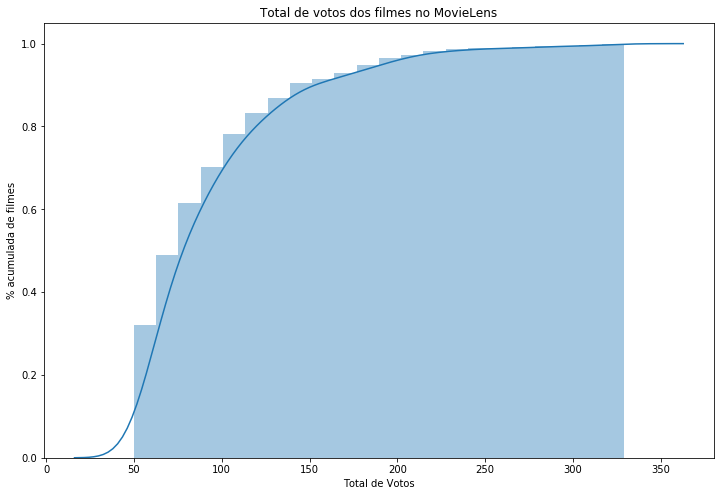

In [17]:
ax = sns.distplot(filmes["total_de_notas"], hist_kws={'cumulative' : True}, kde_kws={'cumulative' : True})
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Total de Votos', ylabel="% acumulada de filmes")
ax.set_title("Total de votos dos filmes no MovieLens")
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 


In [18]:
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Pergunta: Separe a coluna `generos` em diversas colunas.


In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.9209,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.4318,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.2596,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.9461,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.1852,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes


In [22]:
total_de_filmes_por_generos = generos.sum()
total_de_filmes_por_generos = total_de_filmes_por_generos.sort_values(ascending=False)
pd_total_de_filmes_por_generos = pd.DataFrame(total_de_filmes_por_generos, columns=['total_de_filmes'])

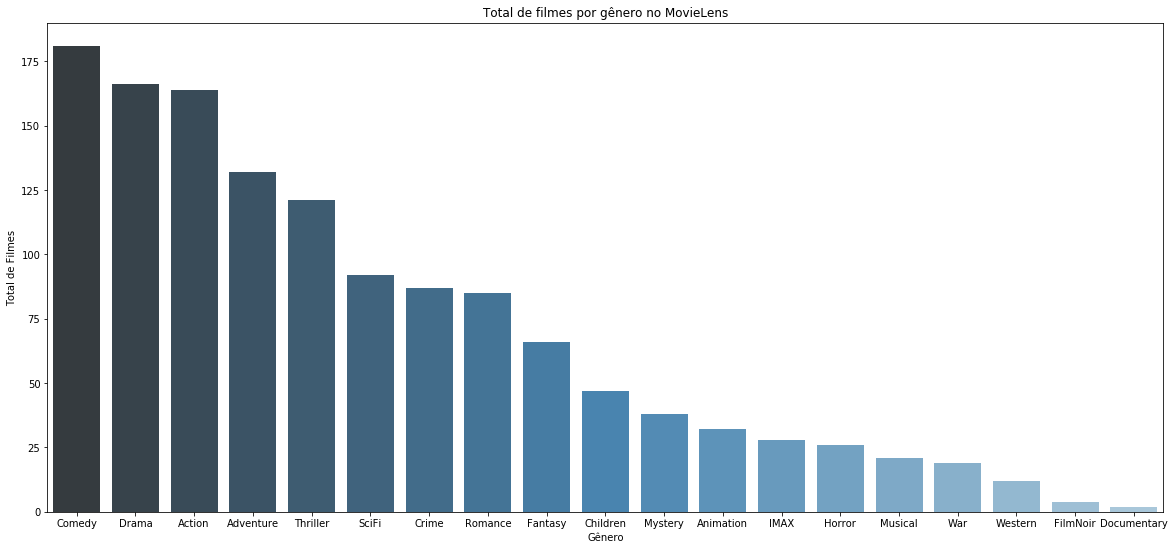

In [23]:
ax = sns.barplot(x=pd_total_de_filmes_por_generos.index, y=pd_total_de_filmes_por_generos['total_de_filmes'], palette="Blues_d", data=pd_total_de_filmes_por_generos)
ax.figure.set_size_inches(20, 9)
ax.set(xlabel='Gênero', ylabel="Total de Filmes")
ax.set_title("Total de filmes por gênero no MovieLens")
ax

## Pergunta: Quais são os 5 generos com mais filmes?

In [24]:
for i in range(0,5): 
    print("Top {} - Gênero: {} Total de Filmes: {} ".format(i+1,total_de_filmes_por_generos.index[i],total_de_filmes_por_generos.values[i]))

Top 1 - Gênero: Comedy Total de Filmes: 181 
Top 2 - Gênero: Drama Total de Filmes: 166 
Top 3 - Gênero: Action Total de Filmes: 164 
Top 4 - Gênero: Adventure Total de Filmes: 132 
Top 5 - Gênero: Thriller Total de Filmes: 121 


## Pergunta: visualização de votos por genero

- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_notas'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
total_de_votos_por_genero = votos_por_genero_por_filme.sum()
total_de_votos_por_genero = total_de_votos_por_genero.sort_values(ascending=False)
pd_total_de_votos_por_genero= pd.DataFrame(total_de_votos_por_genero, columns=['total_de_votos'])
pd_total_de_votos_por_genero.head()

,total_de_votos
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0


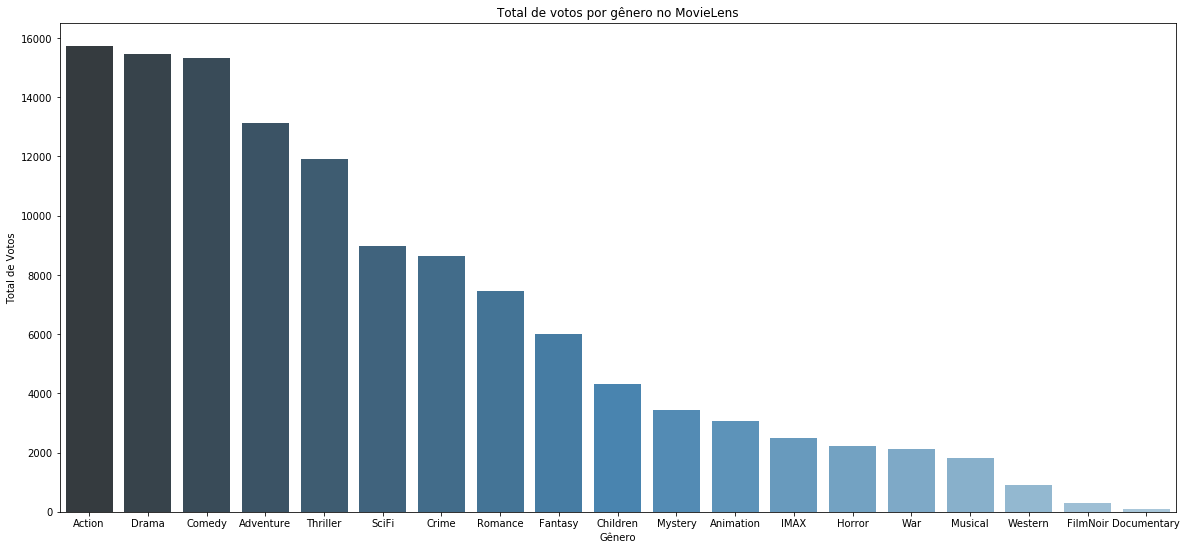

In [27]:
ax = sns.barplot(x=pd_total_de_votos_por_genero.index, y=pd_total_de_votos_por_genero['total_de_votos'], palette="Blues_d", data=pd_total_de_votos_por_genero)
ax.figure.set_size_inches(20, 9)
ax.set(xlabel='Gênero', ylabel="Total de Votos")
ax.set_title("Total de votos por gênero no MovieLens")
ax

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
pd_total_de_filmes_por_generos["numero_de_votos"]=pd_total_de_votos_por_genero['total_de_votos']

In [29]:
pd_total_de_filmes_por_generos["votos_por_filme"]=pd_total_de_filmes_por_generos["numero_de_votos"]/pd_total_de_filmes_por_generos['total_de_filmes']
pd_total_de_filmes_por_generos.sort_values(by = 'votos_por_filme',ascending=False, inplace = True)
pd_total_de_filmes_por_generos.head()

,total_de_filmes,numero_de_votos,votos_por_filme
War,19,2113.0,111.210526
Crime,87,8649.0,99.413793
Adventure,132,13117.0,99.371212
Thriller,121,11907.0,98.404959
SciFi,92,8989.0,97.706522


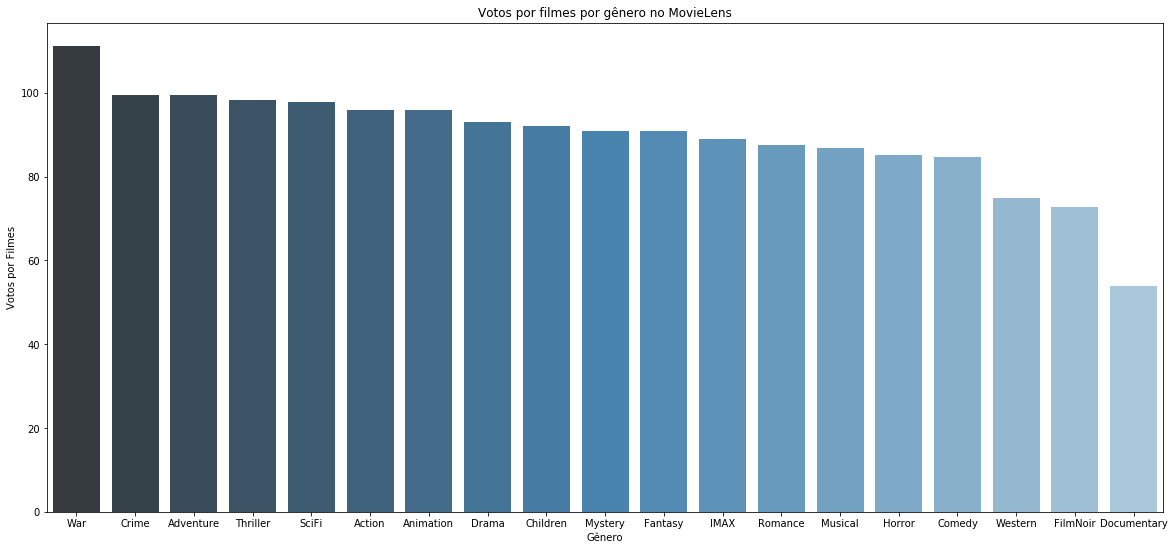

In [30]:
ax = sns.barplot(x=pd_total_de_filmes_por_generos.index, y=pd_total_de_filmes_por_generos['votos_por_filme'], palette="Blues_d", data=pd_total_de_filmes_por_generos)
ax.figure.set_size_inches(20, 9)
ax.set(xlabel='Gênero', ylabel="Votos por Filmes")
ax.set_title("Votos por filmes por gênero no MovieLens")
ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

O gênero War apresenta poucos filmes, mas uma grande quatidade de votos por filme. Portanto, na visualização de votos por filme essa categoria atingiu os melhores resultados. Esses resultados demonstram que o gênero possui características que atraem público, mas sua produção pode possuir empecilhos que impedem a realização de mais filmes do gênero. 

O gênero Action possuiu um consistência nos seus dados, é o gênero com mais votos e o 3º com mais filmes. Em relação o numéro de votos por filmes ficou em 5º. Analisando o Top 5 gêneros com mais filmes (Comedy, Drama, Action, Adventure, Thriller), o único que apresentou resultados discrepantes foi Comédia que possui o 4º pior resultado em numero de votos por filmes. 

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  


In [31]:
filmes_horror=filmes.query("Horror == 1")
filmes_adventure=filmes.query("Adventure==1")

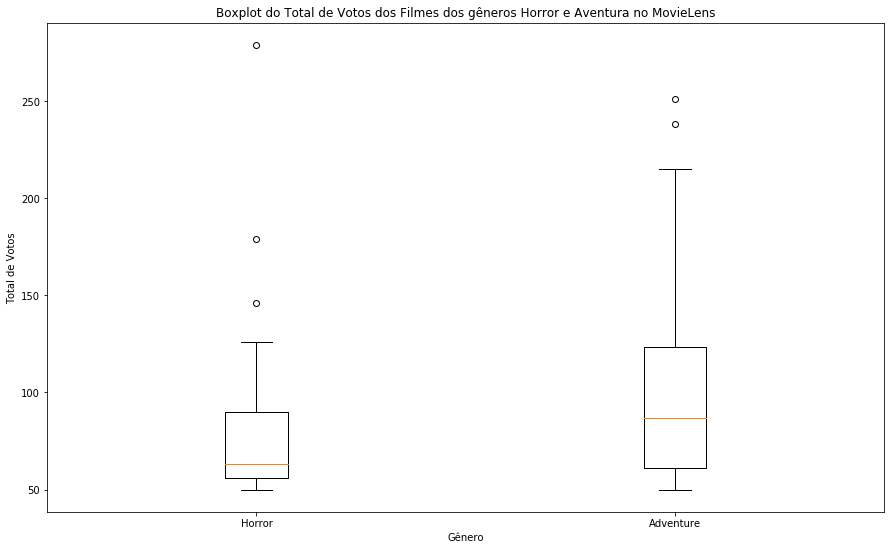

In [32]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 9)
ax.set(xlabel='Gênero', ylabel="Total de Votos")
ax.set_title("Boxplot do Total de Votos dos Filmes dos gêneros Horror e Aventura no MovieLens")
ax.boxplot([filmes_horror["total_de_notas"], filmes_adventure["total_de_notas"]], labels=["Horror","Adventure"])
ax

## Pergunta: mostre agora um boxplot para cada uma das categorias


In [33]:
total_de_notas_por_genero= []
for tipo in generos.columns:
    selecao=filmes.query("{} == 1".format(tipo))["total_de_notas"].values
    total_de_notas_por_genero.append(selecao)

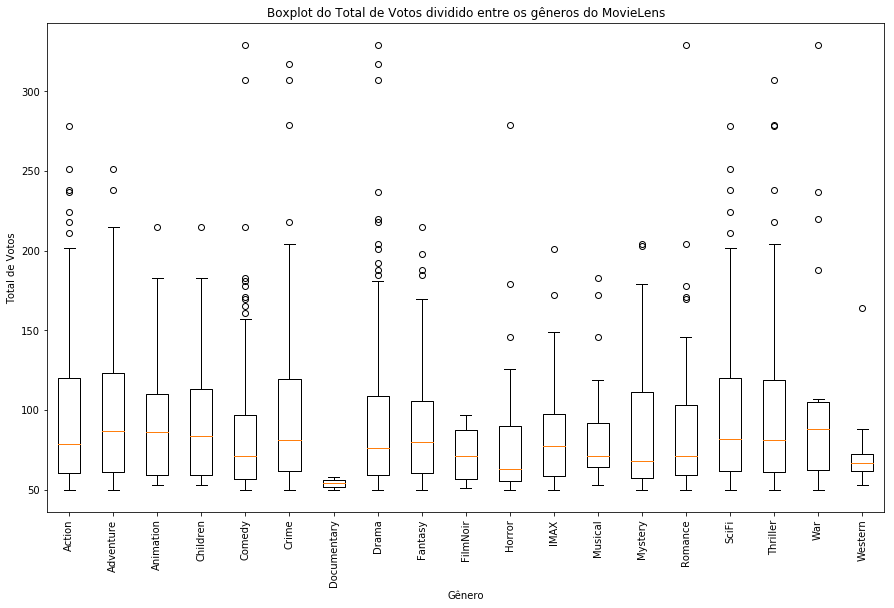

In [34]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 9)
ax.set(xlabel='Gênero', ylabel="Total de Votos")
ax.set_title("Boxplot do Total de Votos dividido entre os gêneros do MovieLens")
ax.boxplot(total_de_notas_por_genero, labels=generos.columns)
plt.xticks(rotation=90)
ax

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

Eu sugiro um filme de aventura, pois o min das duas categorias são parecidos e o interquartil do gênero aventura abrange resultados melhores.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

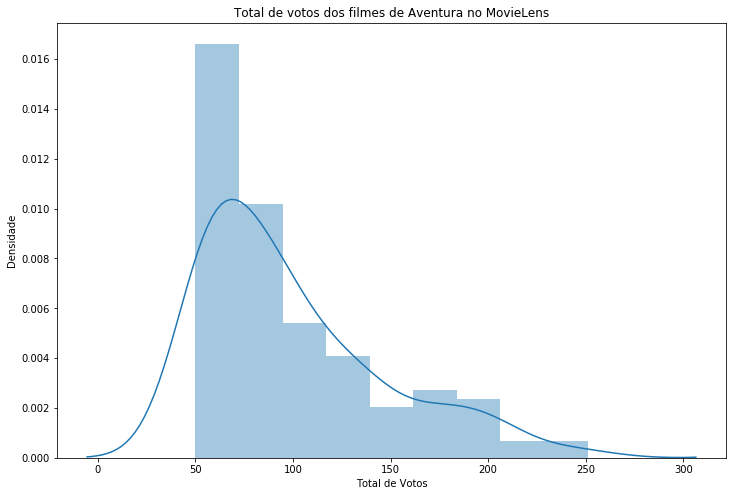

In [35]:
ax = sns.distplot(filmes_adventure["total_de_notas"])
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Total de Votos', ylabel="Densidade")
ax.set_title("Total de votos dos filmes de Aventura no MovieLens")
ax

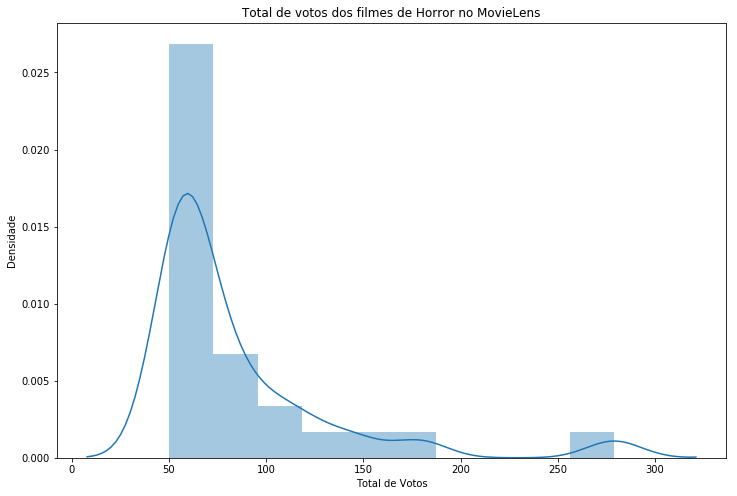

In [36]:
ax = sns.distplot(filmes_horror["total_de_notas"])
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Total de Votos', ylabel="Densidade")
ax.set_title("Total de votos dos filmes de Horror no MovieLens")
ax

In [37]:
_, p = normaltest(filmes_adventure["total_de_notas"])
p

5.987863006199139e-06

In [38]:
_, p = normaltest(filmes_horror["total_de_notas"])
p

1.2786148884334685e-07

p-value para os dois casos menor que 0.05, portanto deve se rejeitar a hipótese nula (a distribuição é normal)

In [39]:
ranksums(filmes_adventure["total_de_notas"],filmes_horror["total_de_notas"])

RanksumsResult(statistic=1.9789320045004148, pvalue=0.04782366231999856)

Com a utilização de testes estatísticos a sugestão pernaceu a mesma. As duas distribuições não são normais, e de acordo com o teste Wilcoxon, utilizando o p-value=0.05, a hipótese nula que os dois conjuntos vem da mesma distribuição deve ser rejeitada. E a hipótese alternativa sugere que a distribuição dos filmes de aventura é maior que a de horror.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

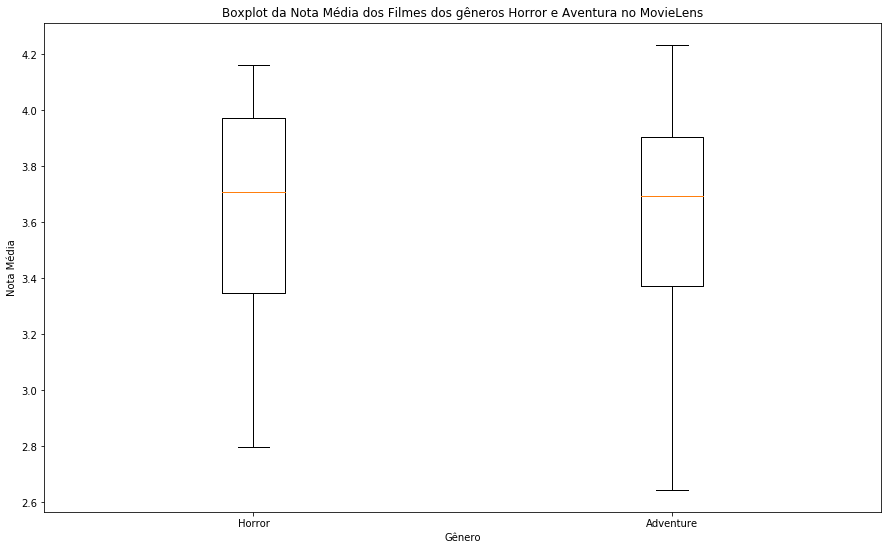

In [40]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 9)
ax.set(xlabel='Gênero', ylabel="Nota Média")
ax.set_title("Boxplot da Nota Média dos Filmes dos gêneros Horror e Aventura no MovieLens")
ax.boxplot([filmes_horror["nota_media"], filmes_adventure["nota_media"]], labels=["Horror","Adventure"])
ax

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

De acordo com o boxxplot, eu recomendaria o gênero de horror. Pois, o seu resultado máximo do Q3 é só um pouco inferior ao de Aventura, entretanto seu interquartil abrange resultados maiores e seu min do Q1 é maior que o de Aventura.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

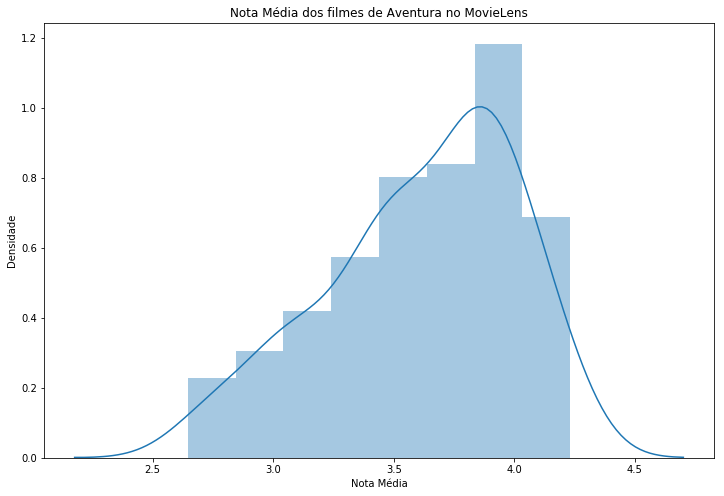

In [41]:
ax = sns.distplot(filmes_adventure["nota_media"])
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Nota Média', ylabel="Densidade")
ax.set_title("Nota Média dos filmes de Aventura no MovieLens")
ax

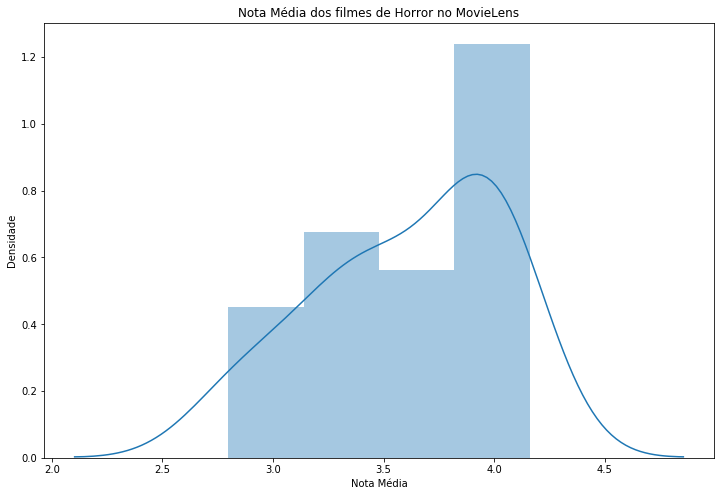

In [42]:
ax = sns.distplot(filmes_horror["nota_media"])
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Nota Média', ylabel="Densidade")
ax.set_title("Nota Média dos filmes de Horror no MovieLens")
ax


In [43]:
_, p = normaltest(filmes_adventure["nota_media"])
p

0.012837467659551233

In [44]:
_, p = normaltest(filmes_horror["nota_media"])
p

0.21188365889852306

os dois p-value são maiores que 0.05, portanto o comportamento das duas distribuição podem ser considerado normais.

In [45]:
filmes_horror["nota_media"].count()

26

In [46]:
filmes_adventure["nota_media"].count()

132

"The sample size is small. Generally, a sample size exceeding 30 sample units is regarded as large". Os filmes de aventura possuem mais que 30, entretanto os de horror possuem menos. Mas a quantidade dos filmes é bem próxima de 30 e os filmes de aventura excedem muito esse valor, portanto será utilizado o z-test

In [47]:
print(ztest(filmes_adventure["nota_media"],filmes_horror["nota_media"]))
zconfint(filmes_adventure["nota_media"],filmes_horror["nota_media"])

(0.05683539758919669, 0.9546763163011074)


(-0.16197840901180616, 0.1716531176365148)

In [48]:
filmes_adventure["nota_media"].describe()

count    132.000000
mean       3.615372
std        0.392215
min        2.645500
25%        3.373575
50%        3.693700
75%        3.904900
max        4.232400
Name: nota_media, dtype: float64

In [49]:
filmes_horror["nota_media"].describe()

count    26.000000
mean      3.610535
std       0.419265
min       2.796900
25%       3.346500
50%       3.707700
75%       3.972875
max       4.161300
Name: nota_media, dtype: float64

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



De acordo com o p-value as médias das duas distribuições são iguais. Portanto, eu permaneceria com a recomendação de horror, devido a diferença na parte superior dos interquartis: <br> 
Horror=[3,34-3,97] <br> 
Aventura=[3,37-3,90]


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

A diferença de nota média entre os dois gêneros é bem sutil, entretanto o teste estatístico em relação ao total de notas demonstrou que os filmes de Aventura possuem uma distribuição maior que as de Horror. Portanto, nesse caso a recomendação seria um filme de Aventura.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [50]:
top_2_generos_mais_votados=pd_total_de_votos_por_genero[0:2].index
top_2_generos_mais_votados

Index(['Action', 'Drama'], dtype='object')

In [51]:
selecao=filmes.query("{} == 1 or {}==1".format(top_2_generos_mais_votados[0],top_2_generos_mais_votados[1]))
top_5_filmes=selecao.sort_values(by=['nota_media'], ascending=False)
for i in range(0,5): 
    print("Top {} - Titulo: {} Nota Média: {} ".format(i+1,top_5_filmes["titulo"].iloc[i],top_5_filmes["nota_media"].iloc[i]))

Top 1 - Titulo: Shawshank Redemption, The (1994) Nota Média: 4.429 
Top 2 - Titulo: Godfather, The (1972) Nota Média: 4.2891 
Top 3 - Titulo: Fight Club (1999) Nota Média: 4.2729 
Top 4 - Titulo: Cool Hand Luke (1967) Nota Média: 4.2719 
Top 5 - Titulo: Godfather: Part II, The (1974) Nota Média: 4.2597 


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

In [52]:
correlacao_nota_media=filmes.corr()
correlacao_nota_media['nota_media'].sort_values(ascending=False)

nota_media           1.000000
total_de_notas       0.342583
Drama                0.277666
Crime                0.190218
Mystery              0.129918
War                  0.125611
FilmNoir             0.081766
IMAX                 0.064935
Animation            0.043071
Documentary         -0.003483
Musical             -0.008531
Thriller            -0.016781
Fantasy             -0.020987
Children            -0.030360
Horror              -0.033871
Western             -0.059641
Romance             -0.072004
Adventure           -0.079985
SciFi               -0.136718
Action              -0.154096
ano_de_lancamento   -0.159146
Comedy              -0.256009
Name: nota_media, dtype: float64

Os dois gêneros com maior correlação com a Nota Média são: Drama e Crime<br>
Os dois gêneros com menor correlação com a Nota Média são: Comédia e Ação  

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [53]:
correlacao_nota_media=filmes.corr()
correlacao_nota_media['total_de_notas'].sort_values(ascending=False)

total_de_notas       1.000000
nota_media           0.342583
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_notas, dtype: float64

Os dois gêneros com maior correlação com o Total de Votos são: Adventure e War<br>
Os dois gêneros com menor correlação com a Nota Média são: Comédia e Faroeste

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média


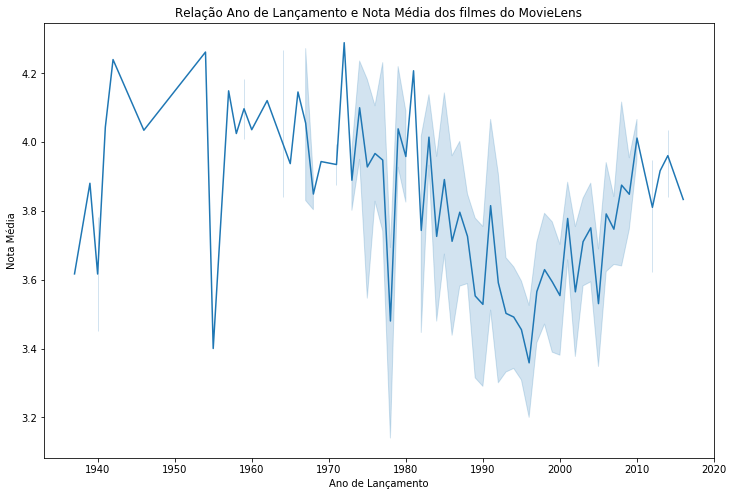

In [54]:
ax = sns.lineplot(x="ano_de_lancamento", y="nota_media", data=filmes)
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Ano de Lançamento', ylabel="Nota Média")
ax.set_title("Relação Ano de Lançamento e Nota Média dos filmes do MovieLens")
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente 
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [55]:
correlacao_nota_media=filmes[['ano_de_lancamento','nota_media']].corr()
correlacao_nota_media

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


Devido a quantidade de filmes durante os anos e o total de votos por filme. Pode-se se gerar uma diminuição da média ao longo dos anos e não necessariamente que os filmes estão piorando com o tempo. 

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

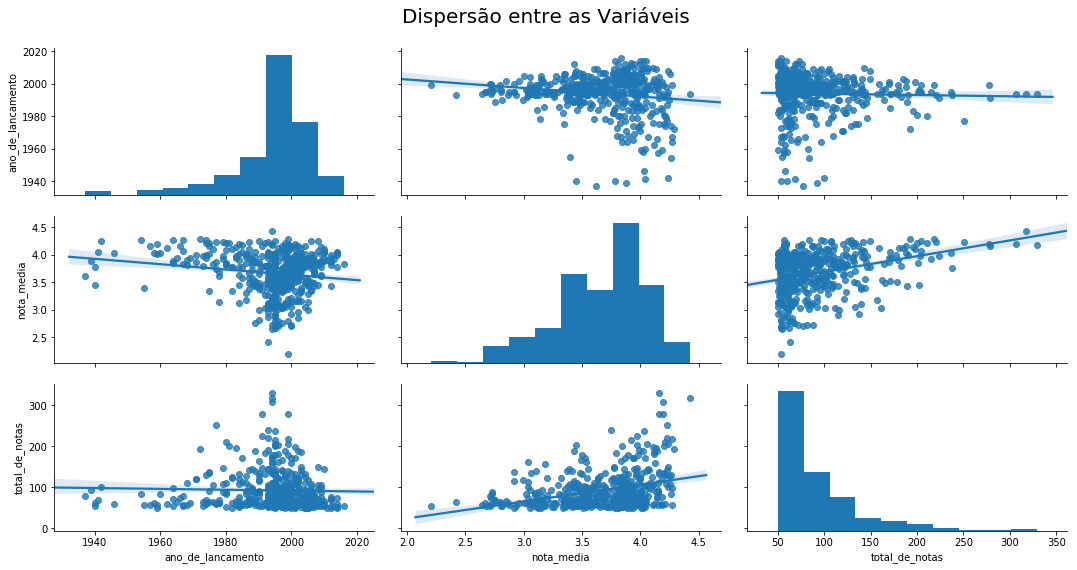

In [56]:
infos=['ano_de_lancamento','nota_media','total_de_notas']
ax = sns.pairplot(filmes[infos],aspect=2,kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

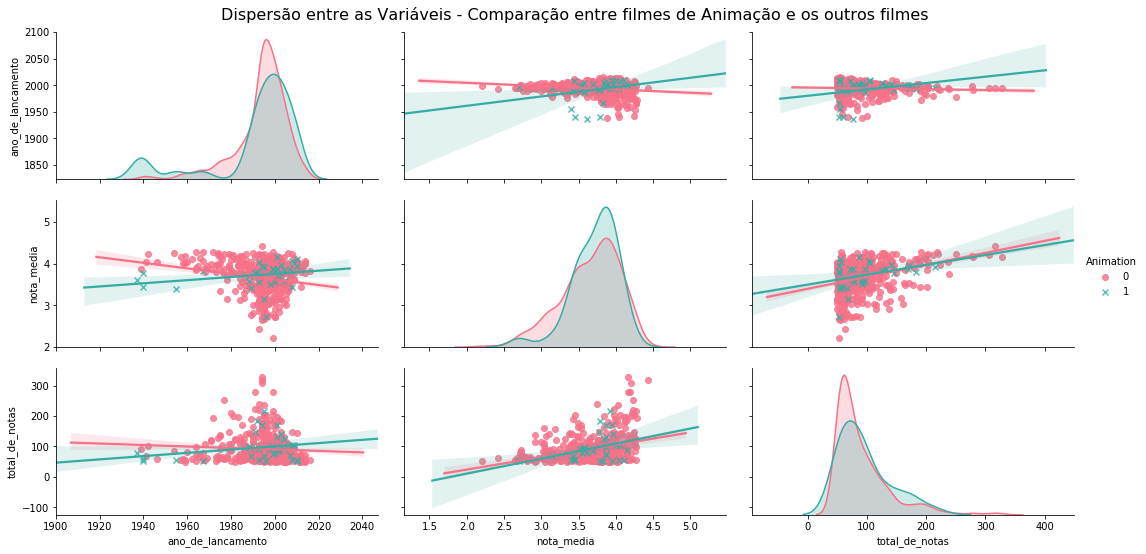

In [57]:
ax = sns.pairplot(x_vars=infos, y_vars=infos,data=filmes, hue="Animation", markers=['o', 'x'],  palette='husl', aspect=2, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis - Comparação entre filmes de Animação e os outros filmes', fontsize=16, y=1.02)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

## Filmes de Animação. Relação Ano de Lançamento X Nota Média

In [58]:
filmes_animacao=filmes.query("Animation == 1")
correlacao_nota_media=filmes_animacao[['ano_de_lancamento','nota_media']].corr()
correlacao_nota_media

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,0.257447
nota_media,0.257447,1.000000


In [59]:
y=filmes_animacao['nota_media'].values
x=filmes_animacao['ano_de_lancamento'].values
x=sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.params

array([-3.79721259e+00,  3.77585091e-03])

In [60]:
results.rsquared

0.0662788577498793

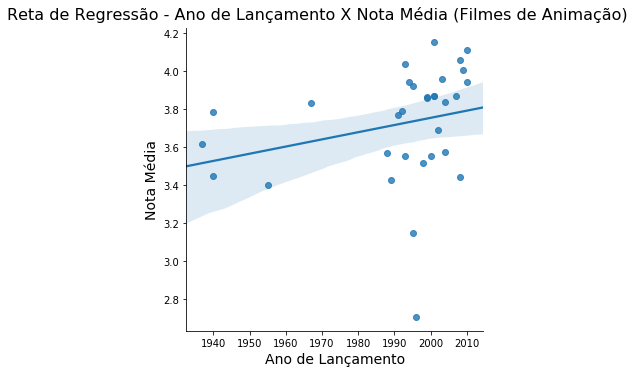

In [61]:
ax = sns.lmplot(x="ano_de_lancamento", y="nota_media", data=filmes_animacao)
ax.fig.suptitle('Reta de Regressão - Ano de Lançamento X Nota Média (Filmes de Animação)', fontsize=16, y=1.02)
ax.set_xlabels("Ano de Lançamento", fontsize=14)
ax.set_ylabels("Nota Média", fontsize=14)
ax

-Diferente das correlação dos outras categorias os filmes de animação possuem uma tendência, positiva da Nota Média com o ano de lançamento. Essa correlação é baixa (0,25) e seu comportamento não linear (R²=0.066).

## E o ano_de_lancamento x total_de_votos?

In [62]:
correlacao_nota_media=filmes_animacao[['ano_de_lancamento','total_de_notas']].corr()
correlacao_nota_media

,ano_de_lancamento,total_de_notas
ano_de_lancamento,1.000000,0.252803
total_de_notas,0.252803,1.000000


In [63]:
y=filmes_animacao['total_de_notas'].values
x=filmes_animacao['ano_de_lancamento'].values
x=sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.params

array([-9.69862438e+02,  5.35103297e-01])

In [64]:
results.rsquared

0.0639095961339079

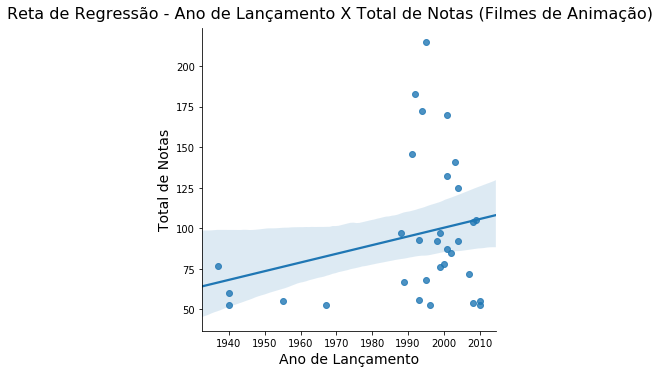

In [65]:
ax = sns.lmplot(x="ano_de_lancamento", y="total_de_notas", data=filmes_animacao)
ax.fig.suptitle('Reta de Regressão - Ano de Lançamento X Total de Notas (Filmes de Animação)', fontsize=16, y=1.02)
ax.set_xlabels("Ano de Lançamento", fontsize=14)
ax.set_ylabels("Total de Notas", fontsize=14)
ax

Como em (Ano de Lançamento X Nota Média) os filmes de animação diferem dos outros filmes, pois sua correlação de (Ano de Lançamento X Total de Votos) é positiva. A correlação é de 0.25 e não é linear. 

Conclusão: Os filmes de animação diferem do comportamento dos outros filmes nas duas análises. As animações possuem uma correlação positiva nos dois casos (Ano de Laçamento X Nota Média e Ano de Lançamento X Total de Votos). Esse fato pode ter uma ligação com a melhora das animações com o desenvolvimento computacional que auxilia em realização projetos mais elaborados.

## Fazendo a análise para categoria Drama

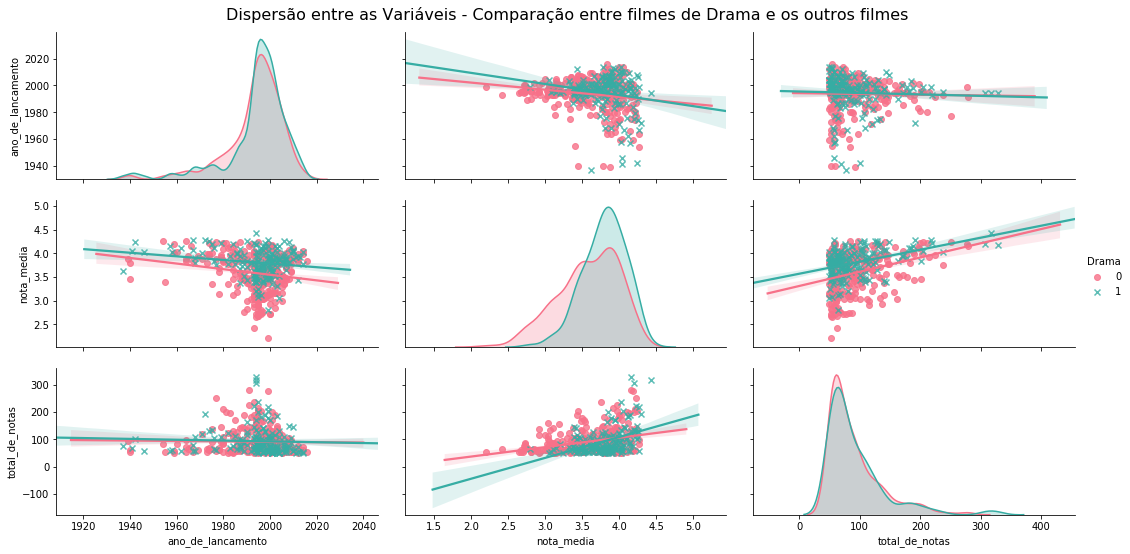

In [66]:
ax = sns.pairplot(x_vars=infos, y_vars=infos,data=filmes, hue="Drama", markers=['o', 'x'],  palette='husl', aspect=2, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis - Comparação entre filmes de Drama e os outros filmes', fontsize=16, y=1.02)
ax

## Ano de lançamento e nota media

In [67]:
filmes_drama=filmes.query("Drama == 1")
correlacao_nota_media=filmes_drama[['ano_de_lancamento','nota_media']].corr()
correlacao_nota_media

,ano_de_lancamento,nota_media
ano_de_lancamento,1.00000,-0.17797
nota_media,-0.17797,1.00000


In [68]:
y=filmes_drama['nota_media'].values
x=filmes_drama['ano_de_lancamento'].values
x=sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.params

array([ 1.14294918e+01, -3.82442788e-03])

In [69]:
results.rsquared

0.0316734378892628

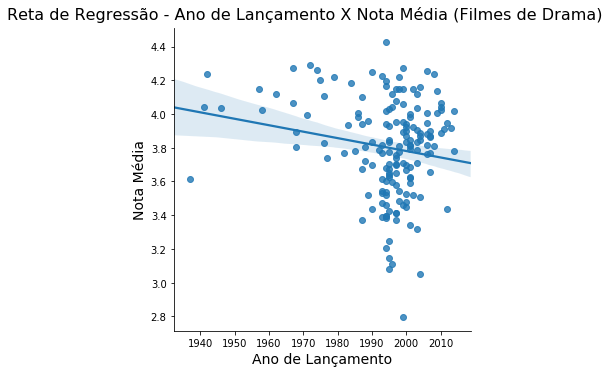

In [70]:
ax = sns.lmplot(x="ano_de_lancamento", y="nota_media", data=filmes_drama)
ax.fig.suptitle('Reta de Regressão - Ano de Lançamento X Nota Média (Filmes de Drama)', fontsize=16, y=1.02)
ax.set_xlabels("Ano de Lançamento", fontsize=14)
ax.set_ylabels("Nota Média", fontsize=14)
ax

Os filmes de drama seguem o mesmo padrão dos outros filmes, entretanto possuem valores de médio levemente superior. Existe uma correlação negativa entre a media e o ano de lançamento, mas esse comportamento é influênciado pelo alto número de filmes em alguns anos, e poucos filmes em anos mais recentes (2008 para frente). Para uma melhor análise desse comportamento deveria se utilizar uma base de dados com mais informações para melhores conclusões.

In [71]:
filmes.groupby("ano_de_lancamento")['nota_media'].count()

ano_de_lancamento
1937.0     1
1939.0     1
1940.0     2
1941.0     1
1942.0     1
1946.0     1
1954.0     1
1955.0     1
1957.0     1
1958.0     1
1959.0     2
1960.0     1
1962.0     1
1964.0     3
1965.0     1
1966.0     1
1967.0     3
1968.0     2
1969.0     1
1971.0     2
1972.0     1
1973.0     2
1974.0     4
1975.0     4
1976.0     2
1977.0     3
1978.0     3
1979.0     3
1980.0     5
1981.0     1
          ..
1986.0     6
1987.0     8
1988.0     6
1989.0     9
1990.0    11
1991.0     4
1992.0     6
1993.0    25
1994.0    28
1995.0    37
1996.0    20
1997.0    22
1998.0    17
1999.0    23
2000.0    24
2001.0    20
2002.0    16
2003.0    15
2004.0    14
2005.0    11
2006.0    11
2007.0    11
2008.0     5
2009.0     9
2010.0     6
2011.0     1
2012.0     5
2013.0     1
2014.0     4
2016.0     1
Name: nota_media, Length: 64, dtype: int64

## E o ano_de_lancamento x total_de_votos?

In [72]:
correlacao_nota_media=filmes_drama[['ano_de_lancamento','total_de_notas']].corr()
correlacao_nota_media

,ano_de_lancamento,total_de_notas
ano_de_lancamento,1.000000,-0.040795
total_de_notas,-0.040795,1.000000


In [73]:
y=filmes_drama['total_de_notas'].values
x=filmes_drama['ano_de_lancamento'].values
x=sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.params

array([ 3.96105303e+02, -1.51955394e-01])

In [74]:
results.rsquared

0.0016642262245036843

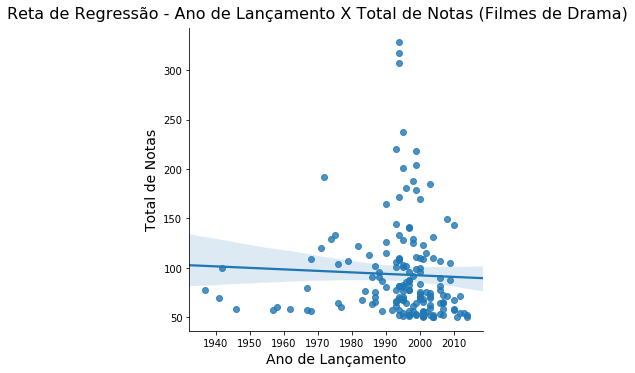

In [75]:
ax = sns.lmplot(x="ano_de_lancamento", y="total_de_notas", data=filmes_drama)
ax.fig.suptitle('Reta de Regressão - Ano de Lançamento X Total de Notas (Filmes de Drama)', fontsize=16, y=1.02)
ax.set_xlabels("Ano de Lançamento", fontsize=14)
ax.set_ylabels("Total de Notas", fontsize=14)
ax

Para os dados do total de votos a categoria de drama apresenta um comportamento bem constante (-0.04), esse comportamento também é encontrado para os outros filmes

Conclusão: Na categoria de Drama os resultados são aparecidos com os encontrados no geral.  

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Minha proposta foi de analisar as combinações entre gêneros e avaliar qual seria as melhores opções de categorias para se fazer um filme. Analisei a mediana de total de votos e nota média para esse estudo.

## Correlações entre gêneros 

In [76]:
corr=generos.corr()

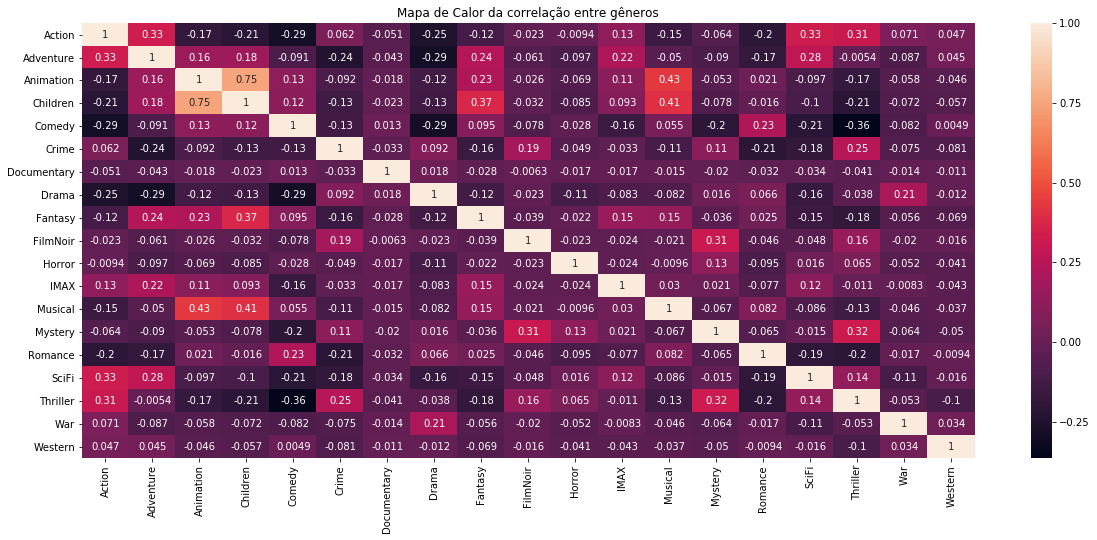

In [77]:
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
ax.set_title("Mapa de Calor da correlação entre gêneros")
ax.figure.set_size_inches(20, 8)
ax

Observações: 
- A maior correlação negativa é entre Terror e  Comédia (-0,36)
- A maior correlação postiva é Infantil e Animação (0,75)
- Musical possui duas corelações positivas relevantes: Animação (0,43) e Infantil (0,41)
- Drama possui 3 correlações negativas relevantes: Ação (-0,25), Aventura (-0,29) e Comédia (-0,29)
- Comédia e Ação tem uma correlação negativa de (-0,29)
- Ação e Aventura possuem uma correlação positiva de (0,33)
- Filme Policial e de Mistério tem correlação positiva de (0,31)
- A Categoria SciFi possui duas corelações positivas relavante e uma negativas relevantes. Positivas: Ação (0,33), Aventura(0,28). Negativas: Romance (-0,19)
- A Comédia Romântica é bem relevante, pois Romance tem 5 correlações negativas relevantes: Ação (-0,2), Aventura:(-0.17), Crime(-0,21), SciFi(-0,19), Terror (-0.2). Mas possue uma correlação de 0,23 com Comédia, em alguns locais Comédia Romântica é considerado um gênero.
- Terror possui a correlação negativa mais forte com Comédia (-0,36), entretanto possui 3 positivas relevantes: Ação (0,31), Crime (0,25) e Mistério (0,32)

## Se eu fosse realizar um filme qual seria minhas categorias?

In [78]:
teste=filmes.copy() #Criando um DataFrame novo para ser modificado

In [79]:
teste['total_generos']=teste[generos.columns].sum(axis=1) #Quantas categorias um filme  possui?

In [80]:
teste['total_generos'].describe()

count    450.000000
mean       2.940000
std        1.187706
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: total_generos, dtype: float64

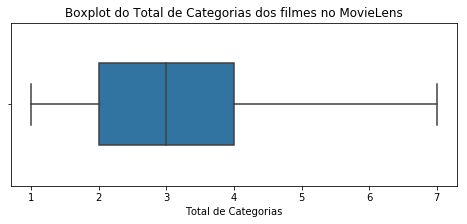

In [81]:
ax = sns.boxplot(teste['total_generos'], width=0.5)
ax.figure.set_size_inches(8, 3)
ax.set(xlabel='Total de Categorias')
ax.set_title("Boxplot do Total de Categorias dos filmes no MovieLens")
ax

O interquartil do Total de Gêneros, é de 2 a 4 gêneros. Os filmes possuem no máximo 7 categorias. 

## Encontrando a combinação ideal

O código relizado abaixo, tem como objetivo encontrar os filmes que tem uma combinação específica de categorias. Diferente dos exercícios que ele encontrava os que possuiam uma determinada categoria.

## Número de possibilidades de categorias

In [82]:
nome_colunas = generos.columns
possibilidades=[]
for L in range(1, 8):
    for subset in itertools.combinations(nome_colunas, L):
        possibilidades.append(subset)
len(possibilidades)

94183

## Encontrando as combinações

In [83]:
avaliacao=teste.copy() #Criando um novo DataFrame para modificações
categorias=pd.DataFrame() #Criando um DataFrame para adicionar as combinações
colunas=list(generos.columns.values) #lista com os nomes das colunas

In [84]:
for m in range (1,8): #for para rodar todas as possibilidades de categorias que são de 1 a 7
    possibilidades=[] #lista que armazena todas as combinações
    for L in range(m,m+1): # for que irá me retornar as possibilidades de categorias para cada número de categorias que eu preciso
        for subset in itertools.combinations(colunas, L):
            possibilidades.append(subset)
    print("O número de possibilidades para essa interação será de {}".format(len(possibilidades)))
    for i in range (0,len(possibilidades)): #Depois de Criado as possibidades será realizado a conferência de cada uma
        tamanho=len(possibilidades[i])
        list1=''
        for j in range (0,tamanho): #Montagem da Query de acordo  com o tamanho da combinação
            if j == 0:
                list2='{} == 1 '.format(possibilidades[i][j])
            else:
                list2='& {} == 1 '.format(possibilidades[i][j])
            list1=list1+list2
        selecao=avaliacao.query("{} & total_generos == {}".format(list1,tamanho)) #seleção das correspondências
        teste_selecao=selecao.empty
        if teste_selecao==False: #Não rodar código abaixo se não houver selecao
            avaliacao.drop(selecao.index.values, inplace=True) #Como nesse caso o filme tem uma correspondência única, ele será removido do DataFrame depois de ser encontrado
            mediana_nota=selecao['nota_media'].median() #mediana das notas
            mediana_votos=selecao['total_de_notas'].median() #mediana de votos
            contagem_votos=selecao['total_de_notas'].count() #número de votos
            pd_selecao=pd.DataFrame([[mediana_votos,mediana_nota,contagem_votos, list1]], columns=['mediana_votos', 'mediana_notas', 'total_filmes', 'generos']) #Criação de um DataFrame Suporte, com a adição dos query correspondente
            categorias=pd.concat([categorias,pd_selecao], ignore_index=True) #Adição dos dados ao DataFrame Categorias
    for tipo in colunas: #Devido ao grande número de possibilidades (94183), irei remover os gêneros que deixaram de ter correspondência com o passar do 'for' para melhorar o desempenho
        removendo_terminados=avaliacao.query("{} == 1".format(tipo)) #verificação
        teste_removendo_terminados=removendo_terminados.empty 
        if teste_removendo_terminados: #É vazio?
            colunas.remove(tipo) #Excluir 

O número de possibilidades para essa interação será de 19
O número de possibilidades para essa interação será de 171
O número de possibilidades para essa interação será de 969
O número de possibilidades para essa interação será de 3060
O número de possibilidades para essa interação será de 6188
O número de possibilidades para essa interação será de 8008
O número de possibilidades para essa interação será de 792


Excluir as colunas que não teriam correspondência e ir apagando parte do DataFrame reduziu o número de possibilidade de 94183 para 19207

In [85]:
categorias.head()

,mediana_votos,mediana_notas,total_filmes,generos
0,65.0,3.66070,25,Comedy == 1
1,58.0,3.77590,1,Documentary == 1
2,73.0,3.85685,20,Drama == 1
3,109.0,4.08260,1,Horror == 1
4,190.0,3.99210,1,Thriller == 1


In [86]:
categorias.shape[0]

204

In [87]:
categorias['total_filmes'].sum()

450

In [88]:
avaliacao.shape[0]

0

In [89]:
teste.shape[0]

450

Todos os filmes foram adicionados no DataFrame Categorias

In [90]:
categorias['total_filmes'].describe()

count    204.000000
mean       2.205882
std        3.256939
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       25.000000
Name: total_filmes, dtype: float64

Um problema encontrado na combinação específica de categorias é que muitas combinações são únicas. Iremos avaliar as combinações mais populares com número de filmes superior a 5.

## Limpar contagem

In [91]:
limpo=categorias.query("total_filmes >= 5")
limpo.describe()

,mediana_votos,mediana_notas,total_filmes
count,17.000000,17.000000,17.000000
mean,81.088235,3.723794,11.000000
std,16.351830,0.181331,6.204837
min,57.000000,3.450300,5.000000
25%,70.000000,3.652900,6.000000
50%,76.000000,3.697500,9.000000
75%,96.500000,3.856850,14.000000
max,112.000000,4.084000,25.000000


Somente 17 combinações possuem 5 ou mais filmes

In [92]:
top_votos=limpo.sort_values(by=['mediana_votos'], ascending=False) #Encontrando os melhores
top_notas=limpo.sort_values(by=['mediana_notas'], ascending=False)

In [93]:
top_notas.head()

,mediana_votos,mediana_notas,total_filmes,generos
62,97.5,4.08400,6,Action == 1 & Drama == 1 & War == 1
19,71.0,3.92450,7,Comedy == 1 & Crime == 1
29,96.5,3.92425,14,Crime == 1 & Drama == 1
98,70.0,3.90000,5,Crime == 1 & Drama == 1 & Thriller == 1
2,73.0,3.85685,20,Drama == 1


In [94]:
top_votos.head()

,mediana_votos,mediana_notas,total_filmes,generos
58,112.0,3.69750,9,Action == 1 & Crime == 1 & Thriller == 1
47,104.5,3.65290,14,Action == 1 & Adventure == 1 & SciFi == 1
34,100.0,3.77610,9,Drama == 1 & Romance == 1
62,97.5,4.08400,6,Action == 1 & Drama == 1 & War == 1
29,96.5,3.92425,14,Crime == 1 & Drama == 1


Conclusões: A combinação (Ação,Drama e Guerra) se destacam com a melhor combinação em nota. E (Ação,Crime,Terror) em relação a votos <br>
(Ação,Drama,Guerra) e (Crime,Drama) aparecem nas duas listas. (Crime,Drama) 3º em nota e 5º votos. (Ação,Drama,Guerra) 1º em nota e 4º em votos. <br>
Nas 10 combinações das duas tabelas em 9 apareceu Crime ou Drama.

Para a quantidade de dados e a quantidade de categorias (19) essa metodologia possui falhas, pois não conseguimos um número interessante de combinações com 5 ou mais filmes <br>
Então, analisarei a seguir as categorias como nos exercícios que analisa somente se existe uma determinada combinação nas categorias dos filmes

# Avaliação para combinações não específicas

## Seleção das combinações

Como esas correspondências não são únicas. O modo de redução do tempo de processamento será diferente. <br>
Se um filme possui somente 1 Categorias quando for verificar as correspondências com 2 Categorias ou mais ele nunca terá correspondência, portanto pode ser excluido.

In [95]:
avaliacao_2=teste.copy() #Criando um novo DataFrame para modificações
categorias_2=pd.DataFrame() #Criando um DataFrame para adicionar as combinações
colunas_2=list(generos.columns.values) #lista com os nomes das colunas

In [96]:
for m in range (1,8): #for para rodar todas as possibilidades de categorias que são de 1 a 7
    possibilidades=[] #lista que armazena todas as combinações
    for L in range(m,m+1): # for que irá me retornar as possibilidades de categorias para cada número de categorias que eu preciso
        for subset in itertools.combinations(colunas_2, L):
            possibilidades.append(subset)
    print("O número de possibilidades para essa interação será de {}".format(len(possibilidades)))
    for i in range (0,len(possibilidades)): #Depois de Criado as possibidades será realizado a conferência de cada uma
        tamanho=len(possibilidades[i])
        list1=''
        for j in range (0,tamanho): #Montagem da Query de acordo  com o tamanho da combinação
            if j == 0:
                list2='{} == 1 '.format(possibilidades[i][j])
            else:
                list2='& {} == 1 '.format(possibilidades[i][j])
            list1=list1+list2
        selecao=avaliacao_2.query("{}".format(list1)) #seleção das correspondências
        teste_selecao=selecao.empty
        if teste_selecao==False: #Não rodar código abaixo se não houver selecao
            mediana_nota=selecao['nota_media'].median() #mediana das notas
            mediana_votos=selecao['total_de_notas'].median() #mediana de votos
            contagem_votos=selecao['total_de_notas'].count() #número de votos
            pd_selecao=pd.DataFrame([[mediana_votos,mediana_nota,contagem_votos, list1]], columns=['mediana_votos', 'mediana_notas', 'total_filmes', 'generos']) #Criação de um DataFrame Suporte, com a adição dos query correspondente
            categorias_2=pd.concat([categorias_2,pd_selecao], ignore_index=True) #Adição dos dados ao DataFrame Categorias_2
    excluir_data_frame=avaliacao_2.query("total_generos == {}".format(tamanho)) #selecao dos com total de generos < que o tamanho das possibilidades da prox interação
    avaliacao_2.drop(excluir_data_frame.index.values, inplace=True) #excluindo
    for tipo in colunas_2: 
        removendo_terminados=avaliacao_2.query("{} == 1".format(tipo)) #verificação
        teste_removendo_terminados=removendo_terminados.empty 
        if teste_removendo_terminados: #É vazio?
            colunas_2.remove(tipo) #Excluir 
        

O número de possibilidades para essa interação será de 19
O número de possibilidades para essa interação será de 171
O número de possibilidades para essa interação será de 969
O número de possibilidades para essa interação será de 3060
O número de possibilidades para essa interação será de 6188
O número de possibilidades para essa interação será de 8008
O número de possibilidades para essa interação será de 792


Essa modificação tb gerou 19207 possibilidades testas

## Verificação

In [97]:
categorias_2.iloc[400]

mediana_votos                                          87.5
mediana_notas                                        3.7299
total_filmes                                              2
generos          Drama == 1 & Romance == 1 & Thriller == 1 
Name: 400, dtype: object

In [98]:
teste.query("Drama == 1 & Romance == 1 & Thriller == 1 ")

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,total_generos
filmeId,,,,,,,,,,,,,,,,,,,,,
587,Ghost (1990),1990.0,3.4348,115.0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,5
903,Vertigo (1958),1958.0,4.0250,60.0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,4


In [99]:
categorias_2['total_filmes'].describe()

count    828.000000
mean       5.553140
std       15.240858
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      181.000000
Name: total_filmes, dtype: float64

Aumentou o número de possibilidades, mas ainda é encontrado muitas combinações únicas.

## Limpar contagem

In [100]:
limpo_2=categorias_2.query("total_filmes >= 5")
limpo_2.describe()

,mediana_votos,mediana_notas,total_filmes
count,164.000000,164.000000,164.000000
mean,80.146341,3.710565,21.719512
std,14.387279,0.173616,29.110863
min,54.000000,3.214900,5.000000
25%,71.875000,3.576100,7.000000
50%,79.000000,3.735150,11.000000
75%,88.000000,3.857100,23.250000
max,146.000000,4.052200,181.000000


O aumento foi considerável de 17 para 164 <br>
Devido ao aumento considerável nessa metodologia irei considerar as correspondências que possuem 10 ou mais filmes

In [101]:
limpo_2=categorias_2.query("total_filmes >= 10")
limpo_2.describe()

,mediana_votos,mediana_notas,total_filmes
count,94.000000,94.000000,94.000000
mean,80.164894,3.727827,33.031915
std,9.266772,0.149068,34.366917
min,59.500000,3.387400,10.000000
25%,75.000000,3.607300,13.250000
50%,79.000000,3.753425,19.000000
75%,87.000000,3.850825,36.750000
max,104.000000,4.025800,181.000000


In [102]:
top_votos_2=limpo_2.sort_values(by=['mediana_votos'], ascending=False) #Encontrando os melhores
top_notas_2=limpo_2.sort_values(by=['mediana_notas'], ascending=False)

In [103]:
top_notas_2.head()

,mediana_votos,mediana_notas,total_filmes,generos
103,88.0,4.0258,16,Drama == 1 & War == 1
17,88.0,4.0200,19,War == 1
379,90.5,3.9595,10,Crime == 1 & Mystery == 1 & Thriller == 1
403,88.0,3.9494,10,Drama == 1 & SciFi == 1 & Thriller == 1
367,90.5,3.9479,18,Crime == 1 & Drama == 1 & Thriller == 1


In [104]:
top_votos_2.head()

,mediana_votos,mediana_notas,total_filmes,generos
212,104.0,3.8676,17,Adventure == 1 & Animation == 1 & Children == 1
36,100.5,3.8694,18,Adventure == 1 & Animation == 1
523,97.0,3.8360,13,Adventure == 1 & Animation == 1 & Children == ...
213,97.0,3.8360,13,Adventure == 1 & Animation == 1 & Comedy == 1
37,97.0,3.7923,25,Adventure == 1 & Children == 1


In [105]:
filmes.query("Adventure == 1 & Animation == 1 & Children == 1")

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.9209,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
364,"Lion King, The (1994)",1994.0,3.9419,172.0,0,1,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
588,Aladdin (1992),1992.0,3.7923,183.0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
673,Space Jam (1996),1996.0,2.7075,53.0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2355,"Bug's Life, A (1998)",1998.0,3.5163,92.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2987,Who Framed Roger Rabbit? (1988),1988.0,3.5722,97.0,0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3114,Toy Story 2 (1999),1999.0,3.8608,97.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4306,Shrek (2001),2001.0,3.8676,170.0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4886,"Monsters, Inc. (2001)",2001.0,3.8712,132.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Em relação a notas Crime e Drama continuam relevantes igual a primeira análise, entretanto a categoria War conseguiu aparecer em 1º e 2º.<br>
Em relação a votos, os filmes da Disney puxam as métricas. Na combinação (Aventura,Animação,Infantil), que ocupa a 1ª colocação, dos 15 dos 17 filmes são da Disney. Portanto esses filmes fazem com que Animação ocupe as 4 primeiras posições em votos. 

## Comparação entre as metodologias

## Nota

In [106]:
top_notas.head()

,mediana_votos,mediana_notas,total_filmes,generos
62,97.5,4.08400,6,Action == 1 & Drama == 1 & War == 1
19,71.0,3.92450,7,Comedy == 1 & Crime == 1
29,96.5,3.92425,14,Crime == 1 & Drama == 1
98,70.0,3.90000,5,Crime == 1 & Drama == 1 & Thriller == 1
2,73.0,3.85685,20,Drama == 1


In [107]:
top_notas_2.head()

,mediana_votos,mediana_notas,total_filmes,generos
103,88.0,4.0258,16,Drama == 1 & War == 1
17,88.0,4.0200,19,War == 1
379,90.5,3.9595,10,Crime == 1 & Mystery == 1 & Thriller == 1
403,88.0,3.9494,10,Drama == 1 & SciFi == 1 & Thriller == 1
367,90.5,3.9479,18,Crime == 1 & Drama == 1 & Thriller == 1


Analisando os dois casos para o foco da produção de um filme que tenha boas críticas. As combinações que possuem Crime ou Drama foram as que mais apareceram, mas War esteve presente no 1º lugar da primeira análise e 1º e 2º na segunda análise. 

## Votos

In [108]:
top_votos.head()

,mediana_votos,mediana_notas,total_filmes,generos
58,112.0,3.69750,9,Action == 1 & Crime == 1 & Thriller == 1
47,104.5,3.65290,14,Action == 1 & Adventure == 1 & SciFi == 1
34,100.0,3.77610,9,Drama == 1 & Romance == 1
62,97.5,4.08400,6,Action == 1 & Drama == 1 & War == 1
29,96.5,3.92425,14,Crime == 1 & Drama == 1


In [109]:
top_votos_2.head()

,mediana_votos,mediana_notas,total_filmes,generos
212,104.0,3.8676,17,Adventure == 1 & Animation == 1 & Children == 1
36,100.5,3.8694,18,Adventure == 1 & Animation == 1
523,97.0,3.8360,13,Adventure == 1 & Animation == 1 & Children == ...
213,97.0,3.8360,13,Adventure == 1 & Animation == 1 & Comedy == 1
37,97.0,3.7923,25,Adventure == 1 & Children == 1


Os dois resultados foram bem diferentes. Para a primeira análise, combinações envolvendo Ação possuem os melhores resultados e em seguida combinações com Drama. Na segunda análise, as Animações(da Disney) dominaram os resultados.